In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df_segmentos = pd.read_json("./datasets/extracao-segmentos.json")

In [4]:
df_segmentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613734 entries, 0 to 613733
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   pk_ato           613734 non-null  int64 
 1   data_publicacao  613734 non-null  object
 2   tipo_ato         613734 non-null  object
 3   pk_segmento      613734 non-null  int64 
 4   tipo_segmento    613734 non-null  object
 5   texto_segmento   613734 non-null  object
dtypes: int64(2), object(4)
memory usage: 28.1+ MB


Notas:
* Nenhum dado ausente detectado (ja era esperado)
* Converter tipos "object" para tipos mais especificos

In [5]:
df_segmentos["tipo_ato"].describe()

count     613734
unique        24
top          ADE
freq      375451
Name: tipo_ato, dtype: object

In [6]:
df_segmentos["tipo_segmento"].describe()

count               613734
unique                  18
top       Não Identificado
freq                197403
Name: tipo_segmento, dtype: object

In [10]:
qtd_atos_por_tipo = df_segmentos[['pk_ato', 'tipo_ato']].groupby("tipo_ato").count().sort_values("pk_ato", ascending=False)
qtd_atos_por_tipo.columns = ['quantidade_atos']
qtd_atos_por_tipo.reset_index(inplace=True)

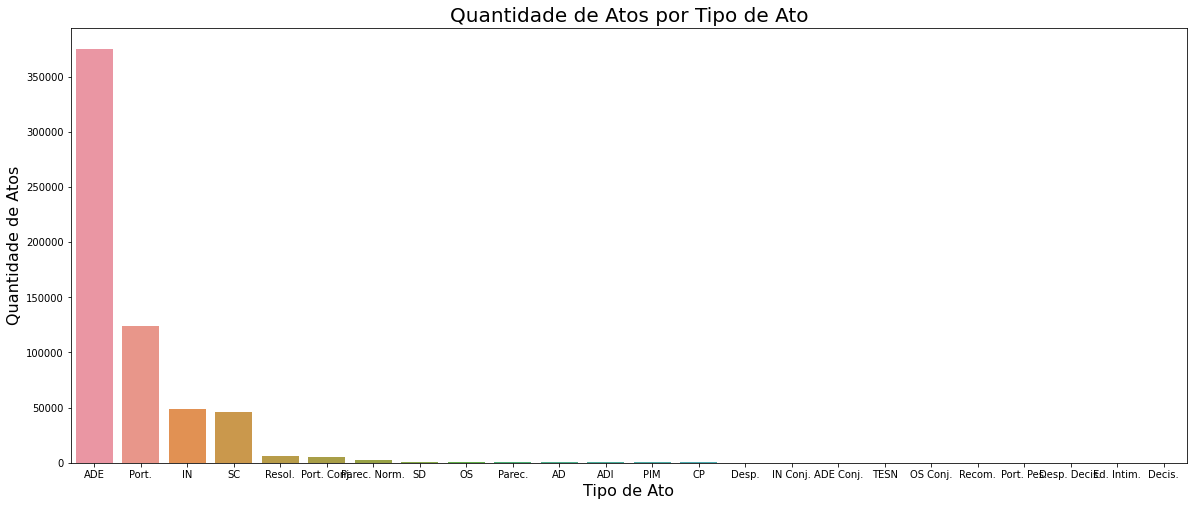

In [11]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_ato', y='quantidade_atos', data=qtd_atos_por_tipo)
ax.set_title('Quantidade de Atos por Tipo de Ato', fontsize=20)
ax.set_ylabel('Quantidade de Atos', fontsize=16)
ax.set_xlabel('Tipo de Ato', fontsize=16)
plt.show()

In [48]:
qtd_segmentos_por_tipo = dados_segmentos[['pk_segmento', 'tipo_segmento']].groupby('tipo_segmento').count().sort_values("pk_segmento", ascending=False)
qtd_segmentos_por_tipo.columns = ['quantidade_segmentos']
qtd_segmentos_por_tipo.reset_index(inplace=True)

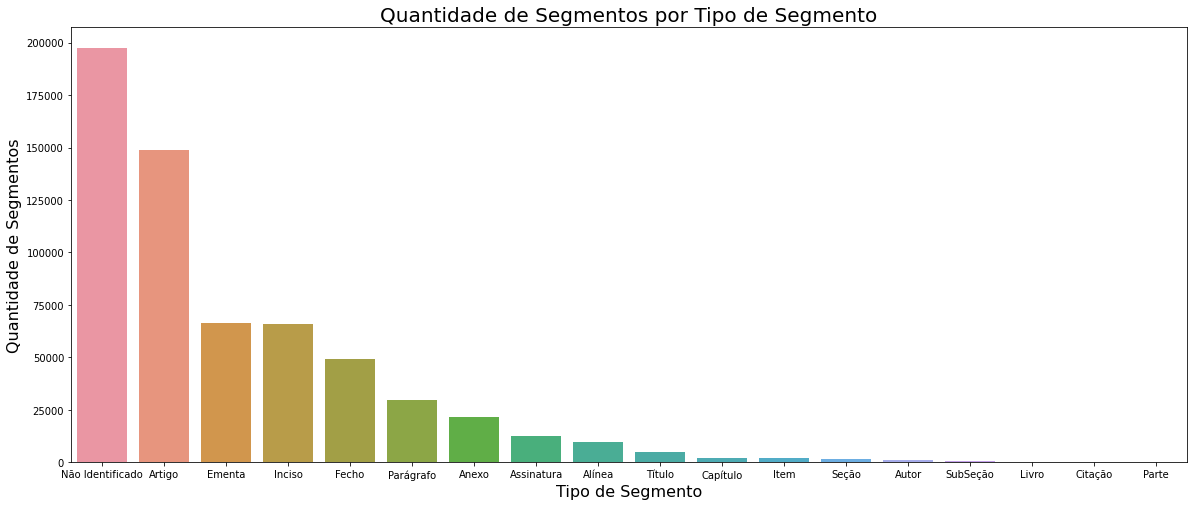

In [55]:
fig = plt.figure(figsize=(20,8))
ax = sns.barplot(x='tipo_segmento', y='quantidade_segmentos', data=qtd_segmentos_por_tipo)
ax.set_title('Quantidade de Segmentos por Tipo de Segmento', fontsize=20)
ax.set_ylabel('Quantidade de Segmentos', fontsize=16)
ax.set_xlabel('Tipo de Segmento', fontsize=16)
plt.show()

In [56]:
atos_com_segmentos_nao_identificados = dados_segmentos[dados_segmentos['tipo_segmento']=='Não Identificado']['pk_ato']